In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Preprocessing**

In [243]:
transaction= pd.read_csv('/content/bank_transactions_data_2.csv')
transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [244]:
transaction.shape

(2512, 16)

Checking Null Value

In [245]:
transaction.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [246]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Checking Duplicate Value

In [247]:
transaction.duplicated().sum()

0

Encoding Categorical Features

In [248]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
transaction['TransactionType_Encoded'] = label_encoder.fit_transform(transaction['TransactionType'])
transaction['Channel_Encoded'] = label_encoder.fit_transform(transaction['Channel'])
transaction['CustomerOccupation_Encoded'] = label_encoder.fit_transform(transaction['CustomerOccupation'])

transaction['TransactionID_Encoded'] = label_encoder.fit_transform(transaction['TransactionID'])
transaction['AccountID_Encoded'] = label_encoder.fit_transform(transaction['AccountID'])
transaction['DeviceID_Encoded'] = label_encoder.fit_transform(transaction['DeviceID'])
transaction['IP Address_Encoded'] = label_encoder.fit_transform(transaction['IP Address'])
transaction['MerchantID_Encoded'] = label_encoder.fit_transform(transaction['MerchantID'])
transaction['Location_Encoded'] = label_encoder.fit_transform(transaction['Location'])

transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,PreviousTransactionDate,TransactionType_Encoded,Channel_Encoded,CustomerOccupation_Encoded,TransactionID_Encoded,AccountID_Encoded,DeviceID_Encoded,IP Address_Encoded,MerchantID_Encoded,Location_Encoded
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,2024-11-04 08:08:08,1,0,0,0,126,365,186,14,36
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,2024-11-04 08:09:35,1,0,0,1,450,50,82,51,15
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,2024-11-04 08:07:04,1,2,3,2,18,229,343,8,23
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,2024-11-04 08:09:06,1,2,3,3,68,182,300,1,33
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,2024-11-04 08:06:39,0,2,3,4,406,298,501,90,1


In [249]:
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])
transaction['PreviousTransactionDate'] = pd.to_datetime(transaction['PreviousTransactionDate'])
transaction['TransactionHour'] = transaction['TransactionDate'].dt.hour
transaction['TimeSinceLastTransaction'] = (transaction['TransactionDate'] - transaction['PreviousTransactionDate']).dt.total_seconds()/3600
transaction['TimeSinceLastTransaction'] = transaction['TimeSinceLastTransaction'].fillna(transaction['TimeSinceLastTransaction'].median())
transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,Channel_Encoded,CustomerOccupation_Encoded,TransactionID_Encoded,AccountID_Encoded,DeviceID_Encoded,IP Address_Encoded,MerchantID_Encoded,Location_Encoded,TransactionHour,TimeSinceLastTransaction
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,0,0,0,126,365,186,14,36,16,-13743.648333
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,0,0,1,450,50,82,51,15,16,-11895.421111
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,2,3,2,18,229,343,8,23,18,-11581.848889
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,2,3,3,68,182,300,1,33,16,-13167.615278
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,2,3,4,406,298,501,90,1,17,-9230.254167


Charts:

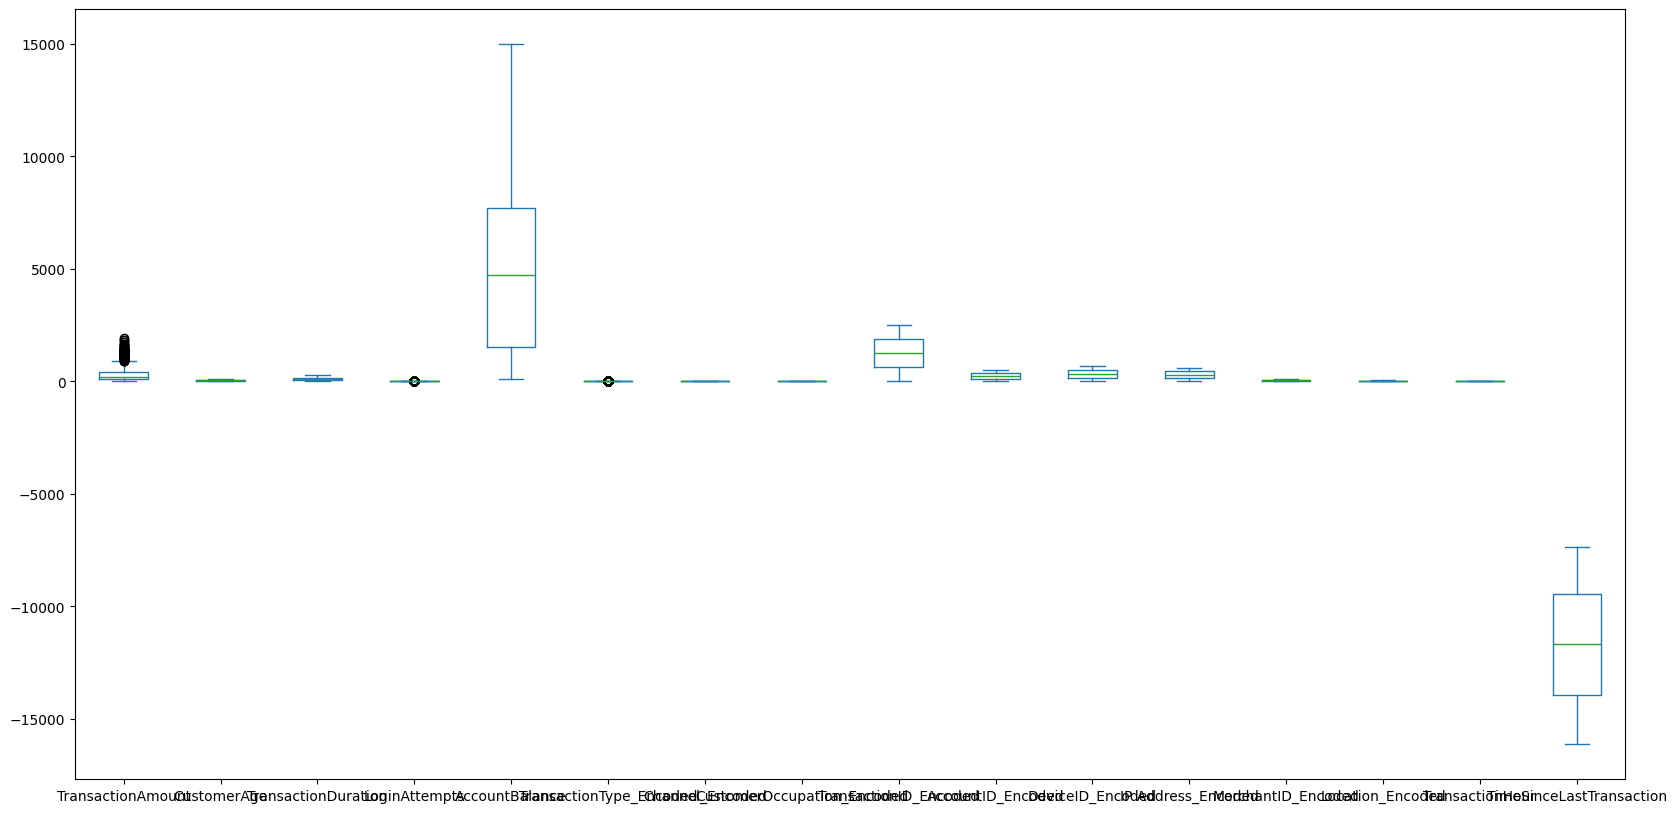

In [250]:
transaction.plot(kind='box',figsize=(20,10))
plt.show()

In [251]:
transaction['FraudScore'] = 0
# Assumption 1: Login Attempts >= 3
transaction.loc[transaction['LoginAttempts'] >= 3, 'FraudScore'] += 1

# Assumption 2: Transaction Duration > Threshold)
transaction.loc[transaction['TransactionDuration'] >200, 'FraudScore'] += 1

# Assumption 3: Customer Age > 60 (or any chosen threshold)
transaction.loc[transaction['CustomerAge'] > 60, 'FraudScore'] += 1

# Assumption 4: Transaction Amount > 50% of Account Balance
transaction.loc[transaction['TransactionAmount'] > 0.5 * transaction['AccountBalance'], 'FraudScore'] += 1

# Assumption 5: Time Since Last Transaction < Threshold
transaction['TimeSinceLastTransaction'] = (
    (transaction['TransactionDate'] - transaction['PreviousTransactionDate']).dt.total_seconds() / 3600
)
transaction.loc[transaction['TimeSinceLastTransaction'] < 1, 'FraudScore'] += 1  # Less than 1 hour

transaction['IsFraud'] = np.where(transaction['FraudScore'] >= 3, 1, 0)

(transaction[['TransactionID', 'FraudScore', 'IsFraud']].head(100))


,TransactionID,FraudScore,IsFraud
0,TX000001,2,0
1,TX000002,2,0
2,TX000003,1,0
3,TX000004,1,0
4,TX000005,1,0
...,...,...,...
95,TX000096,1,0
96,TX000097,1,0
97,TX000098,1,0
98,TX000099,2,0


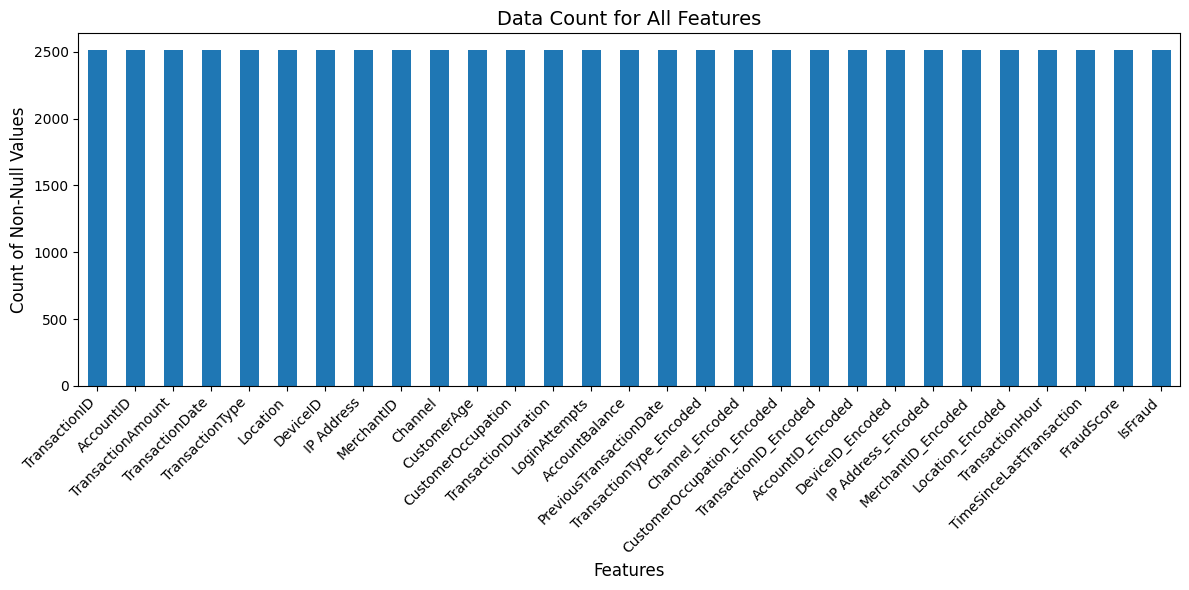

In [252]:
import matplotlib.pyplot as plt

feature_counts = transaction.count()

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')

plt.title('Data Count for All Features', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Count of Non-Null Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

plt.show()


Correlation Matrix

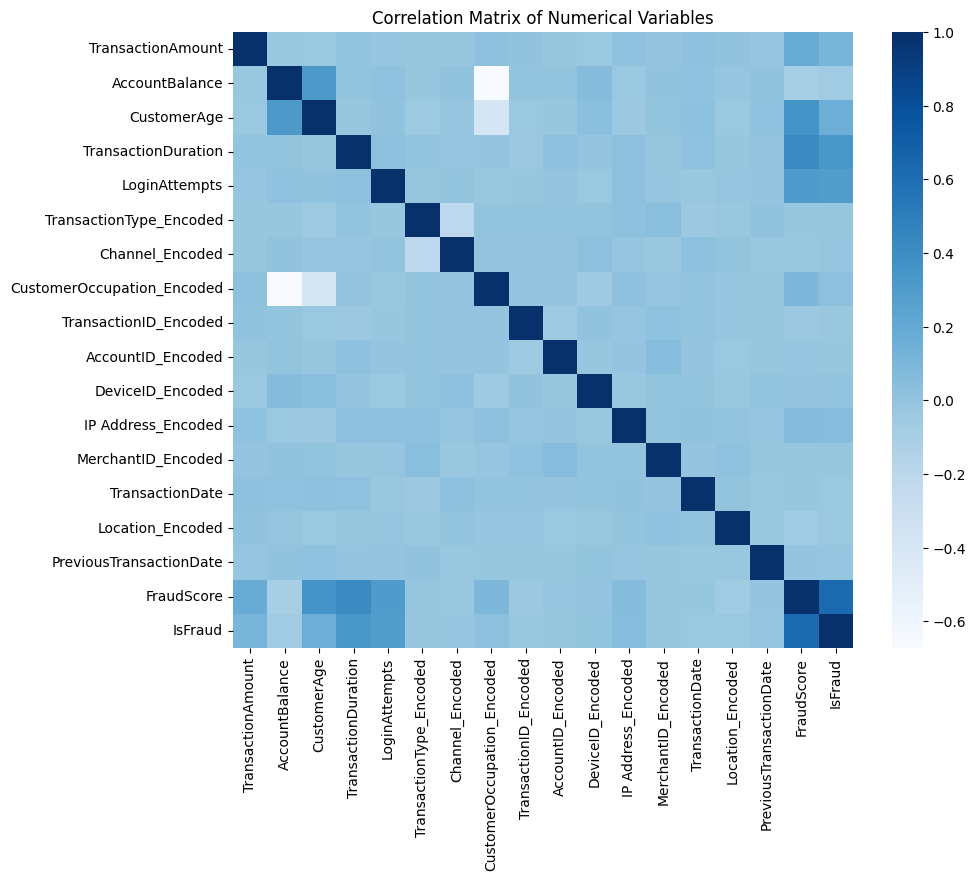

In [253]:
import seaborn as sns
features= ['TransactionAmount', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'TransactionType_Encoded',
           'Channel_Encoded', 'CustomerOccupation_Encoded', 'TransactionID_Encoded', 'AccountID_Encoded', 'DeviceID_Encoded', 'IP Address_Encoded', 'MerchantID_Encoded',
           'TransactionDate', 'Location_Encoded', 'PreviousTransactionDate', 'FraudScore', 'IsFraud']

plt.figure(figsize=(10, 8))
corr_matrix = transaction[features].corr()
sns.heatmap(corr_matrix, annot=False, cmap='Blues')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [254]:
corr_matrix

,TransactionAmount,AccountBalance,CustomerAge,TransactionDuration,LoginAttempts,TransactionType_Encoded,Channel_Encoded,CustomerOccupation_Encoded,TransactionID_Encoded,AccountID_Encoded,DeviceID_Encoded,IP Address_Encoded,MerchantID_Encoded,TransactionDate,Location_Encoded,PreviousTransactionDate,FraudScore,IsFraud
TransactionAmount,1.000000,-0.025165,-0.025616,0.004359,-0.008445,-0.016495,-0.014741,0.026313,0.011141,-0.013288,-0.030384,0.018112,-0.004621,0.024214,0.011179,-0.012421,0.180343,0.107141
AccountBalance,-0.025165,1.000000,0.319942,0.005577,0.014999,-0.018714,0.007980,-0.672282,0.005684,0.006623,0.055976,-0.030020,0.008918,0.019377,-0.006824,0.011006,-0.085166,-0.056050
CustomerAge,-0.025616,0.319942,1.000000,-0.017936,0.007653,-0.044948,-0.012149,-0.378925,-0.026340,-0.016385,0.038914,-0.032337,0.006971,0.023286,-0.030460,0.018661,0.359054,0.160274
TransactionDuration,0.004359,0.005577,-0.017936,1.000000,0.032639,0.001924,-0.010566,-0.003536,-0.036637,0.025715,-0.003963,0.031305,-0.018782,0.019697,-0.016872,-0.003898,0.414024,0.331913
LoginAttempts,-0.008445,0.014999,0.007653,0.032639,1.000000,-0.017730,0.003056,-0.019739,-0.016816,0.000412,-0.028173,0.028550,-0.011494,-0.020750,-0.011013,-0.001411,0.304660,0.291597
TransactionType_Encoded,-0.016495,-0.018714,-0.044948,0.001924,-0.017730,1.000000,-0.207020,0.001583,0.000601,0.006077,0.002013,0.025702,0.040935,-0.033478,-0.021786,0.012648,-0.017097,-0.013112
Channel_Encoded,-0.014741,0.007980,-0.012149,-0.010566,0.003056,-0.207020,1.000000,-0.002951,-0.005763,-0.001078,0.031637,-0.011240,-0.020980,0.023007,0.002359,-0.021854,-0.023495,-0.007871
CustomerOccupation_Encoded,0.026313,-0.672282,-0.378925,-0.003536,-0.019739,0.001583,-0.002951,1.000000,-0.001860,-0.000474,-0.049600,0.024658,-0.007780,0.004265,-0.006527,-0.013453,0.090834,0.028717
TransactionID_Encoded,0.011141,0.005684,-0.026340,-0.036637,-0.016816,0.000601,-0.005763,-0.001860,1.000000,-0.040044,0.012420,-0.007862,0.019716,0.003405,-0.008555,-0.013446,-0.035080,-0.021332
AccountID_Encoded,-0.013288,0.006623,-0.016385,0.025715,0.000412,0.006077,-0.001078,-0.000474,-0.040044,1.000000,-0.013352,-0.003679,0.049267,-0.003965,-0.028600,-0.016875,-0.011483,-0.016536


In [255]:
corr_target= corr_matrix["IsFraud"]
drop_cols = corr_target[(corr_target >= -0.035)&(corr_target<=0.035)].index
print(drop_cols)


Index(['TransactionType_Encoded', 'Channel_Encoded',
       'CustomerOccupation_Encoded', 'TransactionID_Encoded',
       'AccountID_Encoded', 'DeviceID_Encoded', 'MerchantID_Encoded',
       'TransactionDate', 'Location_Encoded', 'PreviousTransactionDate'],
      dtype='object')


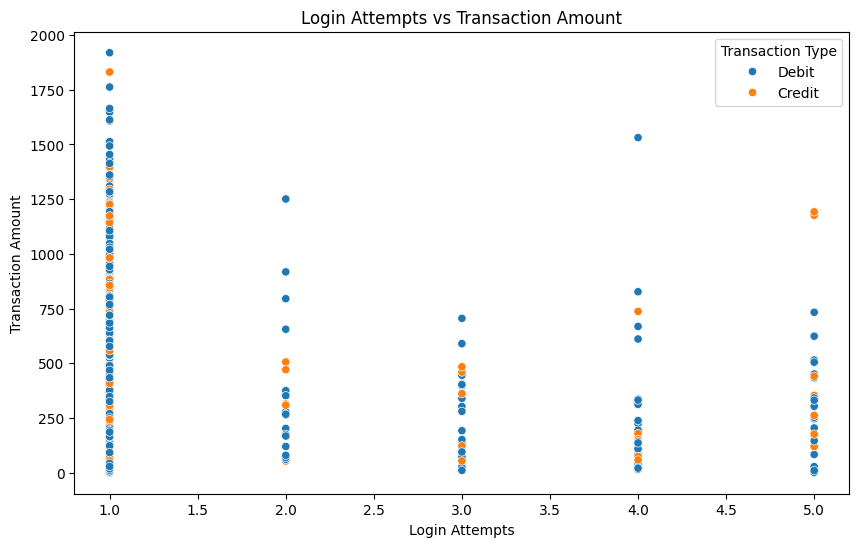

In [256]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LoginAttempts', y='TransactionAmount', hue='TransactionType', data=transaction)
plt.title('Login Attempts vs Transaction Amount')
plt.xlabel('Login Attempts')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()

Creating Transaction Frequency Feature

In [257]:
transaction_counts = transaction.groupby('AccountID').size().reset_index(name='TransactionCount')
transaction = pd.merge(transaction, transaction_counts, on='AccountID', how='left')
transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountID_Encoded,DeviceID_Encoded,IP Address_Encoded,MerchantID_Encoded,Location_Encoded,TransactionHour,TimeSinceLastTransaction,FraudScore,IsFraud,TransactionCount
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,126,365,186,14,36,16,-13743.648333,2,0,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,450,50,82,51,15,16,-11895.421111,2,0,7
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,18,229,343,8,23,18,-11581.848889,1,0,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,68,182,300,1,33,16,-13167.615278,1,0,8
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,406,298,501,90,1,17,-9230.254167,1,0,6


**Dropping Unnecessary Features**

In [258]:
transaction_preprocessed = transaction.drop(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID',
                     'IP Address', 'MerchantID', 'Channel', 'PreviousTransactionDate', 'CustomerOccupation','FraudScore'], axis=1)
transaction_preprocessed.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Encoded,Channel_Encoded,CustomerOccupation_Encoded,TransactionID_Encoded,AccountID_Encoded,DeviceID_Encoded,IP Address_Encoded,MerchantID_Encoded,Location_Encoded,TransactionHour,TimeSinceLastTransaction,IsFraud,TransactionCount
0,14.09,70,81,1,5112.21,1,0,0,0,126,365,186,14,36,16,-13743.648333,0,7
1,376.24,68,141,1,13758.91,1,0,0,1,450,50,82,51,15,16,-11895.421111,0,7
2,126.29,19,56,1,1122.35,1,2,3,2,18,229,343,8,23,18,-11581.848889,0,4
3,184.50,26,25,1,8569.06,1,2,3,3,68,182,300,1,33,16,-13167.615278,0,8
4,13.45,26,198,1,7429.40,0,2,3,4,406,298,501,90,1,17,-9230.254167,0,6


Splitting data in training and testing sets

In [259]:
X = transaction_preprocessed.drop('IsFraud',axis=1)
Y = transaction_preprocessed['IsFraud']

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [261]:
X_train.shape

(1758, 17)

In [262]:
X_test.shape

(754, 17)

In [263]:
Y_train.shape

(1758,)

In [264]:
Y_test.shape

(754,)

Feature Scaling

In [265]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [266]:
X_train_scaled = scaler.transform(X_train)

In [267]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 TransactionAmount                 0.260000
CustomerAge                      18.000000
TransactionDuration              10.000000
LoginAttempts                     1.000000
AccountBalance                  101.250000
TransactionType_Encoded           0.000000
Channel_Encoded                   0.000000
CustomerOccupation_Encoded        0.000000
TransactionID_Encoded             0.000000
AccountID_Encoded                 0.000000
DeviceID_Encoded                  0.000000
IP Address_Encoded                0.000000
MerchantID_Encoded                0.000000
Location_Encoded                  0.000000
TransactionHour                  16.000000
TimeSinceLastTransaction     -16120.169167
TransactionCount                  1.000000
dtype: float64
per-feature maximum before scaling:
 TransactionAmount              1919.1100
CustomerAge                      80.0000
TransactionDuration             297.0000
LoginAttempts                     5.0000
AccountBalance  

In [268]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [269]:
X_test_scaled = scaler.transform(X_test)

KNN Model

In [270]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [271]:
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [272]:
Y_pred=knn.predict(X_test_scaled)

In [273]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [274]:
knn_acc=accuracy_score(Y_test,Y_pred)
knn_conf=confusion_matrix(Y_test,Y_pred)
knn_report=classification_report(Y_test,Y_pred)

In [275]:
print(knn_acc)
print(knn_conf)
print(knn_report)

0.9482758620689655
[[711   5]
 [ 34   4]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       716
           1       0.44      0.11      0.17        38

    accuracy                           0.95       754
   macro avg       0.70      0.55      0.57       754
weighted avg       0.93      0.95      0.93       754



Decision Tree

In [276]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [277]:
dt.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [278]:
Y_pred=dt.predict(X_test_scaled)

In [279]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [280]:
dt_conf=confusion_matrix(Y_test,Y_pred)
dt_ac=accuracy_score(Y_test,Y_pred)
dt_report=classification_report(Y_test,Y_pred)


In [281]:
print(dt_ac)
print(dt_conf)
print(dt_report)

0.9840848806366048
[[708   8]
 [  4  34]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       716
           1       0.81      0.89      0.85        38

    accuracy                           0.98       754
   macro avg       0.90      0.94      0.92       754
weighted avg       0.99      0.98      0.98       754



Logistic Regression


In [282]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [283]:
lr.fit(X_train_scaled,Y_train)

LogisticRegression()

In [284]:
Y_pred=lr.predict(X_test_scaled)

In [285]:
lr_ac=accuracy_score(Y_test,Y_pred)

In [286]:
lr_conf=confusion_matrix(Y_test,Y_pred)
lr_ac=accuracy_score(Y_test,Y_pred)
lr_report=classification_report(Y_test,Y_pred)

In [287]:
print(lr_ac)
print(lr_conf)
print(lr_report)

0.9602122015915119
[[712   4]
 [ 26  12]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       716
           1       0.75      0.32      0.44        38

    accuracy                           0.96       754
   macro avg       0.86      0.66      0.71       754
weighted avg       0.95      0.96      0.95       754



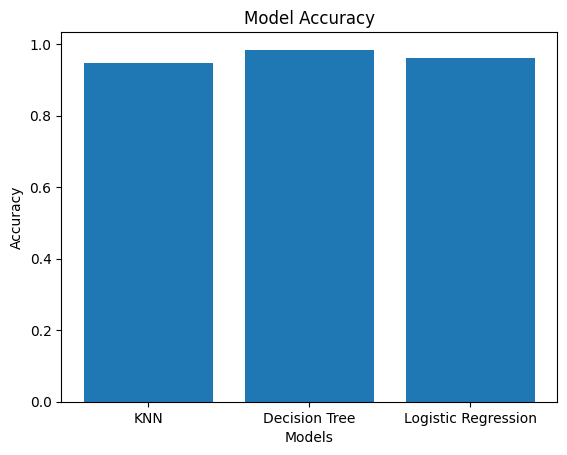

In [288]:
import matplotlib.pyplot as plt
import numpy as np

models = ['KNN', 'Decision Tree', 'Logistic Regression']
acc = [knn_acc, dt_ac, lr_ac]

plt.bar(models, acc)
plt.title('Model Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()